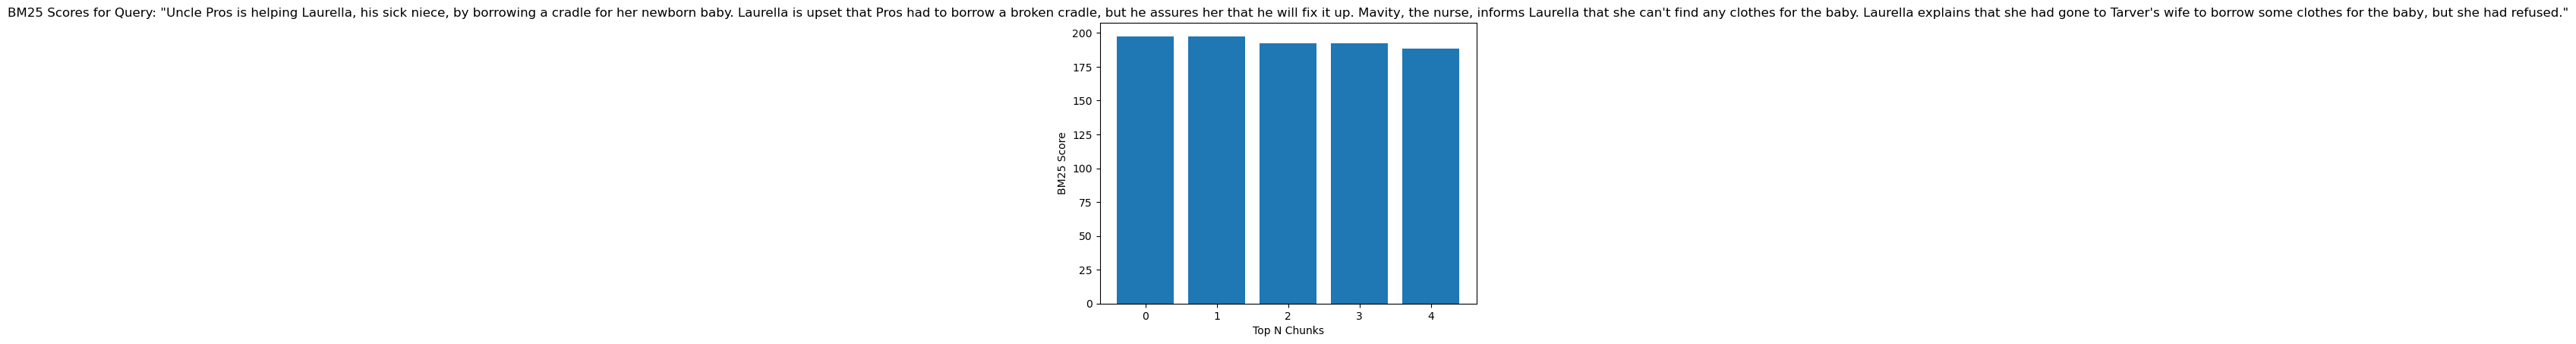

Book Chunk: time he began to hang about her and offer counsel which was often enough
peevishly received.

"No, I ain't et anything that disagreed with me," Laurella pettishly
replied to his well-meant inquiries. "You're thinkin' about yo'se'f. I
never eat more than is good for me, nor anything that ain't jest right.
Hit ain't my stomach. Hit's right there in my side. Looks like hit was
my heart, an' I believe in my soul it is. Oh, law, if I could oncet lay
down befo' a nice, good hickory fire and get my feet warm!"

And so it came to pass that, while everybody in the boarding-house
looked on amazed, almost aghast, Gideon Himes withdrew from the bank
such money as was necessary, and had a chimney built at the side of the
fore room and a broad hearth laid. He begged almost tearfully for a
small grate which should burn the soft bituminous coal of the region,
and be much cheaper to install and maintain. But Laurella turned away
from these suggestions with the hopeless, pliable obstinacy of

In [2]:
import csv
from rank_bm25 import BM25Okapi
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Read data from CSV
book_chunks = []
with open('extracted_data.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        book_chunks.append(row['book_text'])

# Tokenize chunks
tokenized_corpus = [chunk.split(" ") for chunk in book_chunks]
bm25 = BM25Okapi(tokenized_corpus)

# Function to get top N similar chunks for a query
def get_top_n_bm25(query, top_n=5):
    tokenized_query = query.split(" ")
    doc_scores = bm25.get_scores(tokenized_query)
    top_indexes = sorted(range(len(doc_scores)), key=lambda i: doc_scores[i], reverse=True)[:top_n]
    return [(book_chunks[i], doc_scores[i]) for i in top_indexes]

# Visualization
def visualize_scores_bm25(query):
    scores = [score for _, score in get_top_n_bm25(query)]
    plt.bar(range(len(scores)), scores)
    plt.xlabel('Top N Chunks')
    plt.ylabel('BM25 Score')
    plt.title(f'BM25 Scores for Query: "{query}"')
    plt.show()

# Replace this with an actual query
query_bm25 = "Uncle Pros is helping Laurella, his sick niece, by borrowing a cradle for her newborn baby. Laurella is upset that Pros had to borrow a broken cradle, but he assures her that he will fix it up. Mavity, the nurse, informs Laurella that she can't find any clothes for the baby. Laurella explains that she had gone to Tarver's wife to borrow some clothes for the baby, but she had refused." # depth-3-summary
visualize_scores_bm25(query_bm25)
results = get_top_n_bm25(query_bm25)
for result in results:
    print("Book Chunk:", result[0])
    print("BM25 Score:", result[1])
    print("-" * 50)
